In this notebook we are going to upload data on Maroc Telecom stock using yfinance to forecast Stock Adjusted Closing Prices for the next six months.

 First we import our libraries.

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
!pip install Prophet
from prophet import Prophet

     |████████████████████████████████| 5.5MB 17.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=ae4ca148f2d52f559b8b77d71a6e6db22057fad5d8686e6bcdf14561d77f06e2
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 184kB 28.8MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639028 sha256=c6aaa7239fe11361604208c5e85162cd4a964ab5d18464162fdfcd47885175ae
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built Prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0

we extract data from yfinance API.

In [17]:
iam_data = yf.download('IAM', start='2016-01-01', end='2021-04-25')

[*********************100%***********************]  1 of 1 completed


In [18]:
iam_data.reset_index(inplace = True)
iam_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,111.550003,112.199997,111.550003,112.000000,112.000000,58393
1,2016-01-05,111.750000,112.050003,111.750000,112.000000,112.000000,77436
2,2016-01-06,112.000000,112.050003,111.599998,111.650002,111.650002,30794
3,2016-01-07,111.949997,111.949997,111.650002,111.699997,111.699997,58280
4,2016-01-08,111.699997,112.300003,111.699997,112.300003,112.300003,51730


let's plot the most feature we are interested in : Adjusted Closing Price

In [19]:
fig = px.line(iam_data, x="Date", y="Adj Close", title='Maroc Telecom stock Adjusted Closing Prices')
fig.show()

To forcast our data we need to work on two main columns which are Date and Adj Close, and rename it to ds and y respectively.

In [20]:
iam_df = iam_data[['Date','Adj Close']]
iam_df.rename(columns = {'Date':'ds','Adj Close':'y'},inplace = True)
iam_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2016-01-04,112.000000
1,2016-01-05,112.000000
2,2016-01-06,111.650002
3,2016-01-07,111.699997
4,2016-01-08,112.300003


In [21]:
iam_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Then we create our model and fit it using the library Prophet to make forecasts for our univariate time series dataset.

In [22]:
model = Prophet()

In [23]:
model.fit(iam_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
after_six_month = model.make_future_dataframe(periods = 180)

In [25]:
forecast = model.predict(after_six_month)

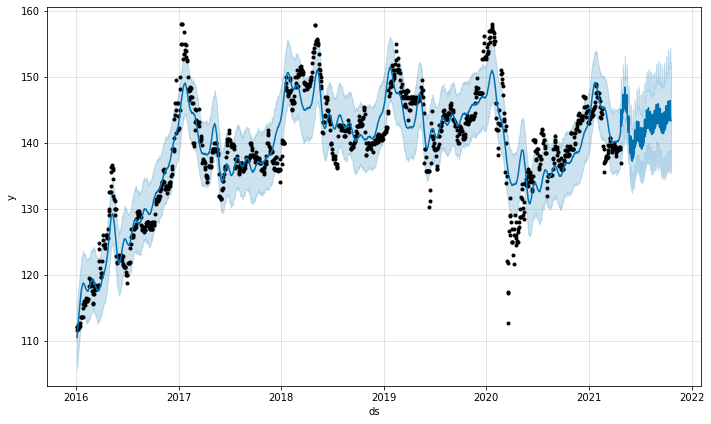

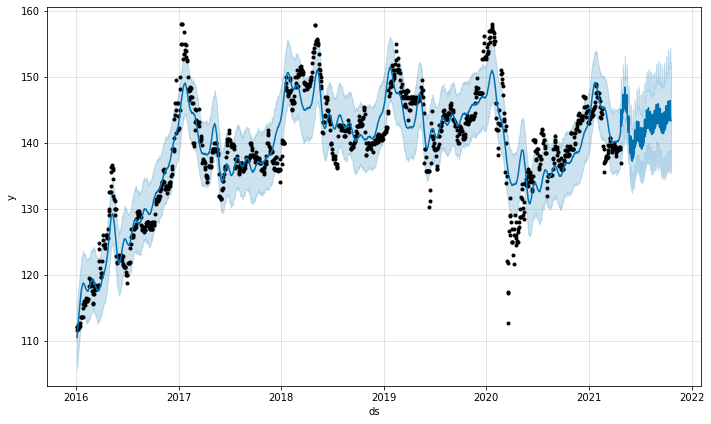

In [26]:
model.plot(forecast)

As we see in that plot, adjusted closing price will probably increase a little bit in the next six months.

In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1510,2021-10-16,146.403864,138.916789,154.374468
1511,2021-10-17,146.394196,138.642853,154.174839
1512,2021-10-18,143.465769,135.433404,152.120752
1513,2021-10-19,143.486069,135.403811,152.291260
1514,2021-10-20,143.356116,135.946109,151.572753


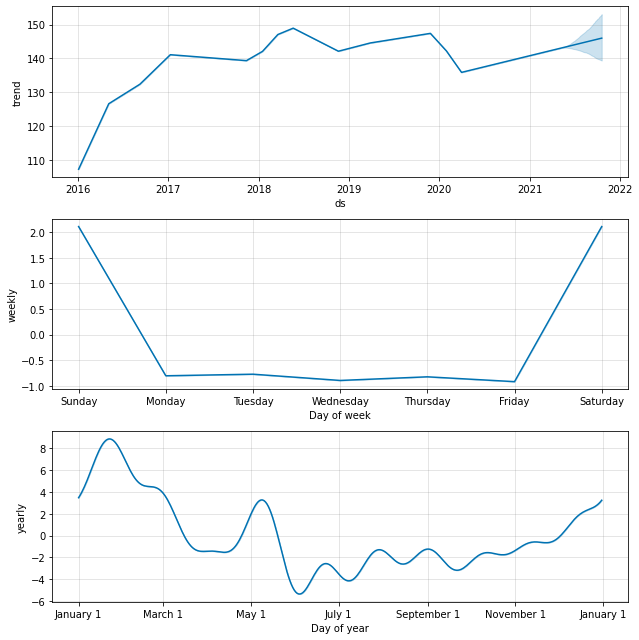

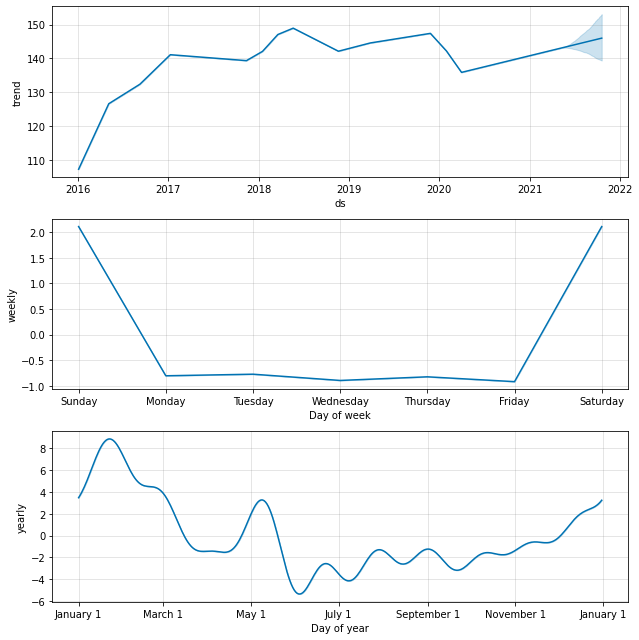

In [28]:
model.plot_components(forecast)